## Title: Leveraging Quadratic Polynomials in Python for Advanced Data Analysis

### Revision 1 - The script to Compare the metrics of the Original quadratic polynomial and Regularized quadratic polynomial fitting with cross-validation.

Original Quadratic Fit R^2: 0.7805
Regularized Quadratic Fit R^2: 0.7734


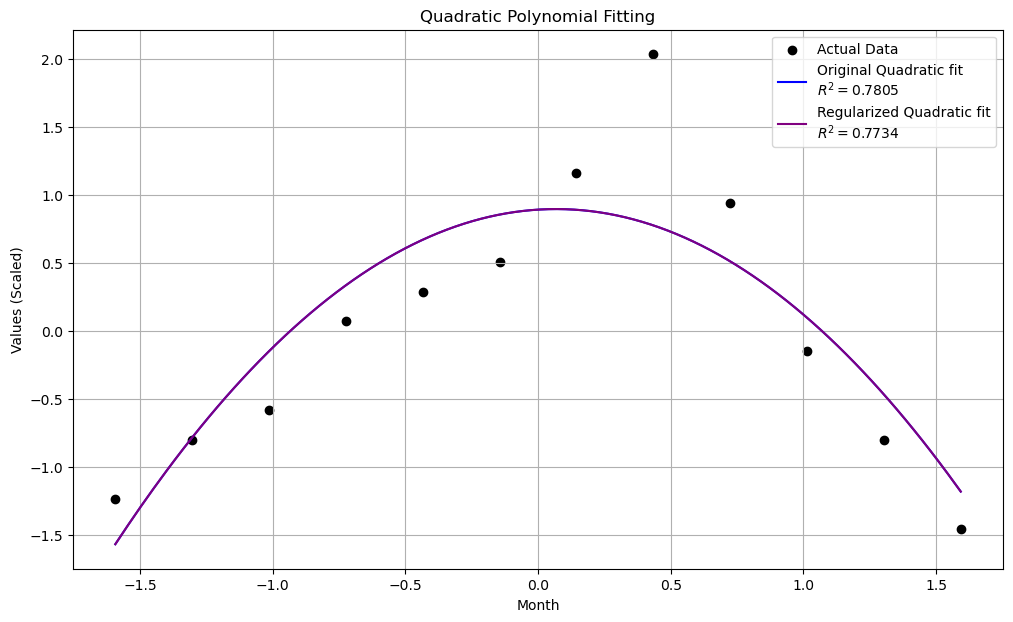

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Sample data
data = pd.DataFrame({
    'Month': np.arange(1, 13),
    'Values': [12, 14, 15, 18, 19, 20, 23, 27, 22, 17, 14, 11]
})

# Define functions
def calculate_metrics(y_true, y_pred, degree):
    residuals = y_true - y_pred
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    r_squared = 1 - (ss_res / ss_tot)
    adjusted_r_squared = 1 - (1 - r_squared) * (len(y_true) - 1) / (len(y_true) - degree - 1)
    mse = mean_squared_error(y_true, y_pred)
    return r_squared, adjusted_r_squared, mse

# Extracting months and values
months = data['Month'].to_numpy()
values = data['Values'].to_numpy()

# Data Normalization using StandardScaler
scaler = StandardScaler()
months_scaled = scaler.fit_transform(months.reshape(-1, 1)).flatten()
values_scaled = scaler.fit_transform(values.reshape(-1, 1)).flatten()

# Original quadratic polynomial fitting
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(months_scaled.reshape(-1, 1))
ridge_reg = Ridge(alpha=0)  # No regularization to mimic the original polynomial fit
ridge_reg.fit(X_poly, values_scaled)
quadratic_pred_original = ridge_reg.predict(X_poly)
quadratic_metrics_original = calculate_metrics(values_scaled, quadratic_pred_original, 2)

# Regularized quadratic polynomial fitting with cross-validation
ridge_reg = Ridge(alpha=1.0)
model = make_pipeline(poly_features, ridge_reg)

kf = KFold(n_splits=5, shuffle=True, random_state=1)
cross_val_scores = cross_val_score(model, months_scaled.reshape(-1, 1), values_scaled, cv=kf, scoring='neg_mean_squared_error')

model.fit(months_scaled.reshape(-1, 1), values_scaled)
quadratic_pred_regularized = model.predict(months_scaled.reshape(-1, 1))
quadratic_metrics_regularized = calculate_metrics(values_scaled, quadratic_pred_regularized, 2)

# Print the results
print(f"Original Quadratic Fit R^2: {quadratic_metrics_original[0]:.4f}")
print(f"Regularized Quadratic Fit R^2: {quadratic_metrics_regularized[0]:.4f}")

# Plotting to visualize
x = np.linspace(months_scaled.min(), months_scaled.max(), 200)
quadratic_y_original = ridge_reg.predict(poly_features.fit_transform(x.reshape(-1, 1)))
quadratic_y_regularized = model.predict(x.reshape(-1, 1))

plt.figure(figsize=(12, 7))
plt.scatter(months_scaled, values_scaled, color='black', label='Actual Data')
plt.plot(x, quadratic_y_original, color='blue', label=f'Original Quadratic fit\n'
                                               f'$R^2 = {quadratic_metrics_original[0]:.4f}$')
plt.plot(x, quadratic_y_regularized, color='purple', label=f'Regularized Quadratic fit\n'
                                               f'$R^2 = {quadratic_metrics_regularized[0]:.4f}$')
plt.title('Quadratic Polynomial Fitting')
plt.xlabel('Month')
plt.ylabel('Values (Scaled)')
plt.legend()
plt.grid(True)
plt.show()
